## Linear Regression Part3 Model and Cost Function
In this post I will write more about the theory of Linear Regression and illustrate the model and "Cost Function" ("squared error function"). We will try to understand what the model is really doing and how we are going to determine it's parameters. If you get a good grasp on this then other more complicated Machine Learning algorithms will be much easier to understand.

## Understanding the Model and Cost Function
This is what we are doing;
- **[Data] --** We found a data set of King county house prices and features
- **[Training Set] --** After looking at and evaluating the data we extracted a training set that gives us house sale prices vs house size in sqft for zipcode 98039.
- **[Model function] --** Our **model ("hypothesis" or "estimator" or "predictor")** will be a straight line "fit" to the training set".
- **[Cost Function] --** Sum of squared errors that we will minimize with respect to the model parameters.
-  **[Learning Algorithm] --** Linear "least squares" Regression

The first two items were taken care of in **[Part 2 ](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-2-963/)**. This post is looking at (visually) the model and cost function in more detail to gain some insight about how the linear regression algorithms will work. The next post will look at implementing and "doing" the linear regression algorithm with a gradient decent and exact solution.  
In **[Part 1](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-1-954/)** we introduced some definitions and notation which I will briefly review below.

#### Notation

- **Model function** -- $ h_a(x) = a_0 + a_1x $

- $h_a(x)$ -- will be the price that our model predicts i.e. $h_a(x)$ **is a function that "maps" house sizes to prices**.
- $ a = \{a_0, a_1\}$ -- is a set of **parameters** for the function $h_a(x)$. We want to find the "best" parameters.
- $x$ -- is our input variable (the size of a house in square feet ).
- $y$ -- is the selling (price) of the house. $h_a(x)$ is an approximation of $y$, $h_a(x) \approx y$.
- **Data representation** -- Our data is represented as pairs of values $ (x^{(i)}, y^{(i)}) $.

- The superscript $(i)$ is referring to the $i^{th}$ data pair in our training set.
- $m$ will be the number of data points.

## Visualize the Model

**Note:** In what follows I will be using a small set of "random" data to make the presentation clearer. At the end of the post we will take a quick at our "real" data again.  

$h_a(x) = a_0 + a_1x$ is an equation for a straight line with a "slope" of $a_1$ and an "intercept" of $a_0$. We say that $h_a(x)$ is a linear function of $x$ that is parameterized by $a_0$ and $a_1$. The following are a few plots with different values of $a_0, a_1$.


In [1]:
import pandas as pd  # data handeling
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core
import seaborn as sns  # higher level plotting tools
%matplotlib inline
sns.set()

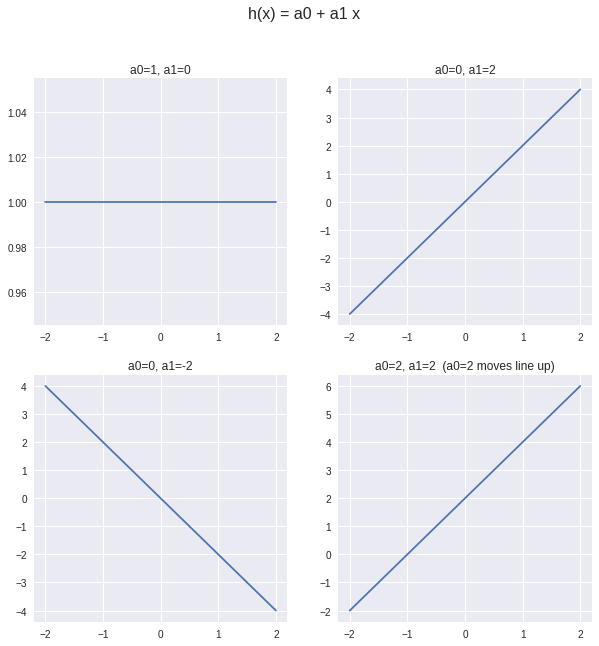

In [2]:
x = np.linspace(-2,2,10)
plt.figure(1, figsize=(10,10)); plt.suptitle('h(x) = a0 + a1 x', fontsize=16)
plt.subplot(221); plt.plot(x, 1 + 0*x ); plt.title('a0=1, a1=0')
plt.subplot(222); plt.plot(x, 0 + 2*x ); plt.title('a0=0, a1=2')
plt.subplot(223); plt.plot(x, 0 - 2*x ); plt.title('a0=0, a1=-2')
plt.subplot(224); plt.plot(x, 2 + 2*x ); plt.title('a0=2, a1=2  (a0=2 moves line up)')

> **The main problem in Machine Learning is;** <br>
**Find parameters for a model function that minimizes the error between values predicted by the model and those know from the training set.**

#### What error are we talking about?

In the following plot there are some random "training samples", a model function (line) $h_a(x) = 0.1 + 1.2x$, ( $a_0 = 0.1, a_1 = 1.2$) and vertical green lines from the model function to the data points. **The lengths of those cyan lines are the errors between the model function $h_a(x)$ and the training set data points**.

In [3]:
# some simple random (close to linear) data
x = np.linspace(0,5,5)
#y = np.linspace(0,5,5) + 1 + np.random.randn(5)
y = [ 0.21378624, 1.97217916, 2.36737375, 5.13718724, 6.26470731]

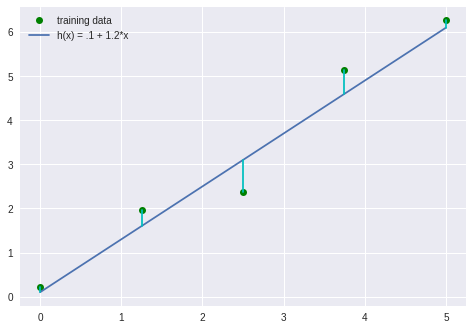

In [4]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, .1 + 1.2*x, label='h(x) = .1 + 1.2*x')
for i in range(len(x)):
    ax.plot([x[i], x[i]], [.1 + 1.2*x[i],y[i]], '-', color='c')
plt.legend();

The goal of linear regression is to make the sum of all of those errors as small as possible by finding the "best" parameters for $h_a(x)$ i.e. $a_0, a_1$ in our case. We are looking at "**least squares**" linear regression.

 ## The Cost Function (Error Function)
 Our model is $h_a(x) = a_0 + a_1x$ and it is an approximation of $y^{(i)}$ at any given value $x^{(i)}$. So the error is;
 
 $$ Error = h_a(x^{i}) - y^{(i)} $$
 
 That's just the difference between the value or model predicts and the actual value in the training set. These errors can be positive or negative. We want to add them all up and make that sum as small as possible so we want the errors to be positive numbers so they don't cancel out in any way. A simple way to to that is to square those errors.
 
 $$ SquaredError = (h_a(x^{i}) - y^{(i)})^2  $$
 
 Now add them up and and call it $J(a_0,a_1)$ (why $J$?  ... it's a common choice).
 
 $$
  J(a_0, a_1) = \frac{1}{2m} \sum_{i=1}^{m}(h_a(x^{i}) - y^{(i)})^2  
 $$
 
 $$ = \frac{1}{2m} \sum_{i=1}^{m}((a_0 + a_1(x^{i})) - y^{(i)})^2 $$

In words this says: take the summation, ($\sum$), of the squares of the errors between the model and all $m$ data points in the training set. The constant factor $1/m$ averages the squared error and $1/2$ is in there for convenience when we take derivatives later.

$J(a_0,a_1)$ is a function of the parameters $a_0, a_1$. **The goal is to minimize** $J$ with respect to $a_0, a_1$.

$$ \text{Linear Regression Goal} \to \min_{a_0,a_1} J(a_0,a_1) $$

## Visualize the Cost Function
$J$ is a sum of squares, a second order polynomial equation. That means that it is parabolic.If we set $a_0 = 0$ (or some other constant value) and just look at $J$ as a function of $a_1$ then it is a simple parabola with an obvious minimum.


In [5]:
# The function J
def J(a0, a1, x, y, m):
    J = 0
    for i in range(m):
        J += ((a0 + a1*x[i]) - y[i] )**2
    return J


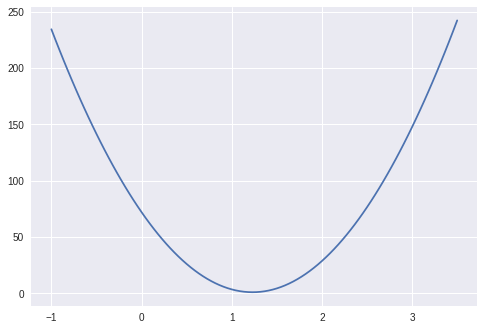

In [6]:
a = np.linspace(-1,3.5,100)
plt.plot(a, J(0.1,a,x,y,m=len(x)) ) # set a0 to 0.1

To make it clear how the regression line relates to the cost function I'll plot the test data we used earlier with a set of lines for a range of values of $a_1$ and set $a_0 = 0.1$. Following that will be those values plotted with $J(a_0,a_1)$ (the values of the sums of the squared errors for each line).

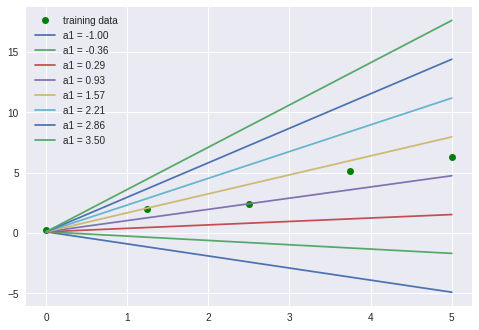

In [7]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
a1 = np.linspace(-1,3.5,8)
for i in range(len(a1)):
    ax.plot(x, .1 + a1[i]*x, label='a1 = %.2f' %a1[i] )

plt.legend();

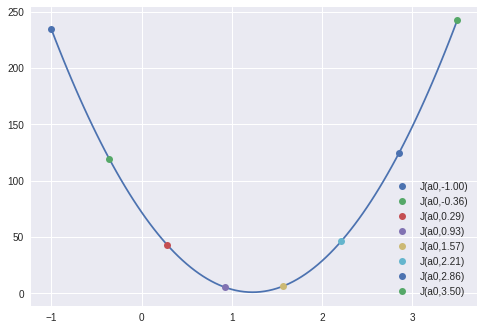

In [8]:
fig, ax = plt.subplots()
a = np.linspace(-1,3.5,100)
ax.plot(a, J(0.1,a,x,y,m=len(x)), c='C0')
for i in range(len(a1)):
    ax.plot(a1[i], J(0.1,a1[i],x,y,m=len(x)), 'o', label='J(a0,%.2f)' %a1[i])
plt.legend();

You can see that the gold ($a_1=1.57$) and purple ($a_1=0.93$) lines are closest to the minimum. 

In the plots above I set the variable $a_0$ to a constant, 0.1, so that I could make a 2-d plot. To see what $J(a_0,a_1)$ looks like when both $a_0$ and $a_1$ change we can look at 3-d plots. The dimension variables are $a_0$, $a_1$ and $J(a_0,a_1)$. Two ways to make 3-d plots are surface, and contour plots.


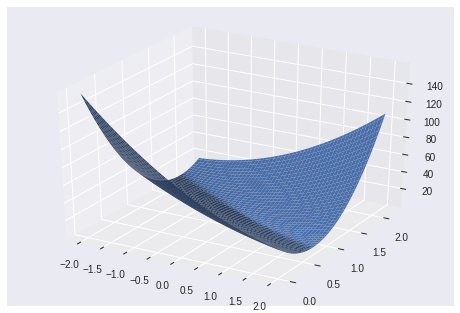

In [9]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
a0 = np.linspace(-2,2,100)
a1 = np.linspace(0,2.2,100)
aa0, aa1 = np.meshgrid(a0, a1)
ax.plot_surface(aa0, aa1, J(aa0,aa1,x,y,m=len(x)))
#ax.view_init(45,35)

Contour plots are like USGS topological maps (you are a wilderness hiker aren't you!). The contour lines are constant "elevation" which in our case is the value of $J(a_0,a_1)$.

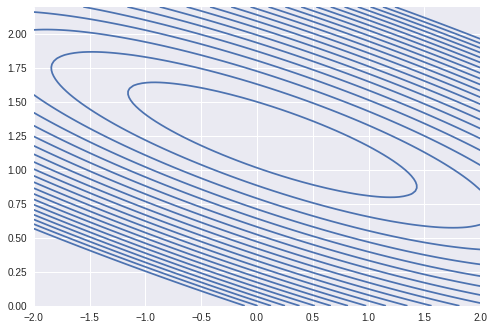

In [10]:
a0 = np.linspace(-2,2, 100)
a1 = np.linspace(0,2.2, 100)
#J(aa0,aa1,x,y,m=len(x))
aa0, aa1 = np.meshgrid(a0, a1)
plt.contour(aa0,aa1,J(aa0,aa1,x,y,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,3.75)])

Hopefully that gives you an idea of where we are going next when we look at an algorithm and program to find the minimum of $J$.

Just so you don't think that I've forgotten about our 98039 zipcode housing data here's a plot of that with errors added in and a line fit to the data.

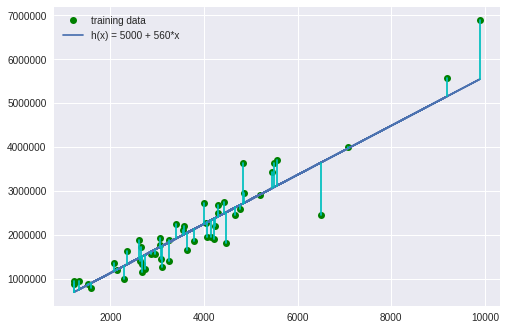

In [11]:
df_98039 = pd.read_csv("df_98039.csv")
x = df_98039['sqft_living']
y = df_98039['price']
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, 5000 + 560*x, label='h(x) = 5000 + 560*x')
for i in range(len(x)):
    ax.plot([x[i], x[i]], [5000 + 560*x[i],y[i]], '-', color='c')
plt.legend();

I think that is enough for this post! In the next post I will go through how to find the optimal parameters that minimize the cost function. For that I will go through how to do a gradient decent optimization and show how the linear regression problem can be "solved" directly with some matrix expressions and linear algebra. I will, again, do it in detail! If you follow all of this then more advanced machine learning methods will be much clearer. Finally after all of that we will get back to our housing prices data for zipcode 98039.

**Happy computing --dbk**  